In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [38]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'

In [39]:
orgfile=f'{bigDir}\signals_org_v4.csv'
newfile=f'{bigDir}\\new dataset\signals_new_v4.csv'
file=f'{bigDir}\signals_combined_v2.csv'

In [40]:
orgdata=pd.read_csv(orgfile)
newdata=pd.read_csv(newfile)
data=pd.read_csv(file)

# data visualizations - new dataset

In [41]:
newdata=newdata.drop(columns=['Unnamed: 0'])

In [42]:
newdata.head()

file original cell name                       movie  \
0  20191203_cell-00.czi     20191125-01-17  191125pcnat_dhbr_cdc6vxy01   
1  20191203_cell-01.czi     20191125-01-20  191125pcnat_dhbr_cdc6vxy01   
2  20191203_cell-02.czi     20191125-01-23  191125pcnat_dhbr_cdc6vxy01   
3  20191203_cell-03.czi     20191125-01-25  191125pcnat_dhbr_cdc6vxy01   
4  20191203_cell-04.czi     20191125-01-32  191125pcnat_dhbr_cdc6vxy01   

   last frame movie position x  last frame movie position y ab1 (MCM)  ab1 ch  \
0                      678.301                      200.931      MCM3       1   
1                     1552.152                      240.479      MCM3       1   
2                     1131.436                      318.530      MCM3       1   
3                     1650.585                      324.968      MCM3       1   
4                     1466.687                      426.815      MCM3       1   

  ab2 (heterochromatin)  ab2 ch  DAPI ch  ...  nuc_DAPI_het inner_DAPI_het  \
0               HP1beta       2        3  ...  1.061172e+09   6.286906e+08   
1               HP1beta       2        3  ...  1.812075e+09   1.086345e+09   
2               HP1beta       2        3  ...  1.774444e+09   1.047682e+09   
3               HP1beta       2        3  ...  1.229128e+09   5.907975e+08   
4               HP1beta       2        3  ...  1.261960e+09   7.882228e+08   

   outer_DAPI_het   nuc_DAPI_eu inner_DAPI_eu  outer_DAPI_eu        day  \
0     432481890.0  2.027203e+09  3.354374e+08   1.691765e+09  d20191203   
1     725729186.0  4.615195e+09  1.007696e+09   3.607499e+09  d20191203   
2     726762664.0  4.452523e+09  9.484609e+08   3.504062e+09  d20191203   
3     638330656.0  2.382242e+09  2.544991e+08   2.127743e+09  d20191203   
4     473737399.0  2.363135e+09  3.864823e+08   1.976653e+09  d20191203   

   decon      p_age  mol_age_mod  
0  False   6.666667        0.444  
1  False        NaN        1.373  
2  False  16.166667        1.371  
3  False   1.500000        0.208  
4  False   5.166667        0.345  

[5 rows x 50 columns]

In [43]:
len(newdata)

276

In [44]:
newdatasel=newdata.loc[((newdata.decon==True) & (newdata['ab2 (heterochromatin)']=='HP1beta')),:].copy()

In [45]:
len(newdatasel)

138

In [46]:
newdatand=newdata.loc[((newdata.decon==False) & (newdata['ab2 (heterochromatin)']=='HP1beta')),:].copy()

In [47]:
len(newdatand)

138

In [48]:
myTrendData=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [49]:
myTrendDatand=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

# deconvolved

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


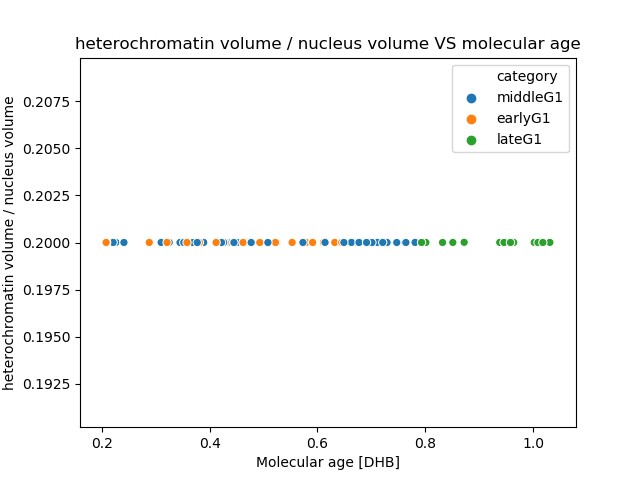

Text(0.5, 1.0, 'heterochromatin volume / nucleus volume VS molecular age')

In [50]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_vol_het/newdatasel.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volume / nucleus volume VS molecular age')

In [51]:
len(newdatasel)

138

## 2b.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


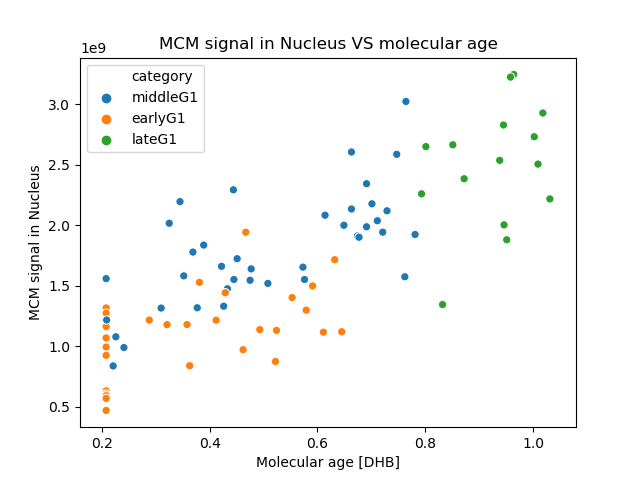

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [52]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


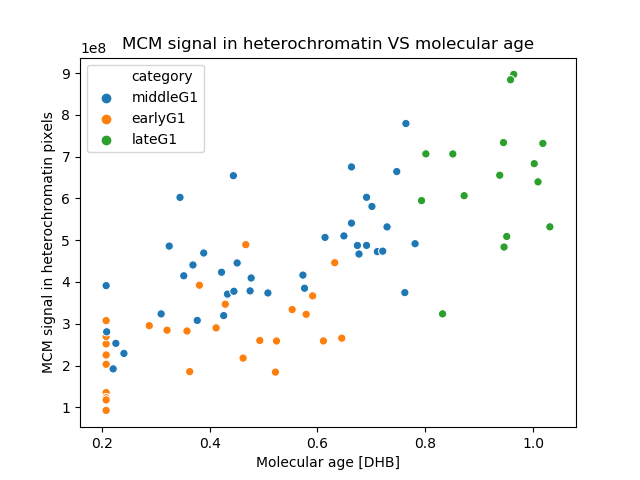

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [53]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


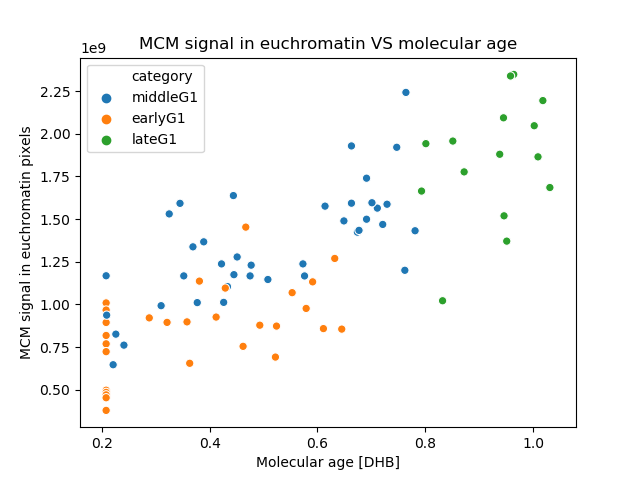

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [54]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


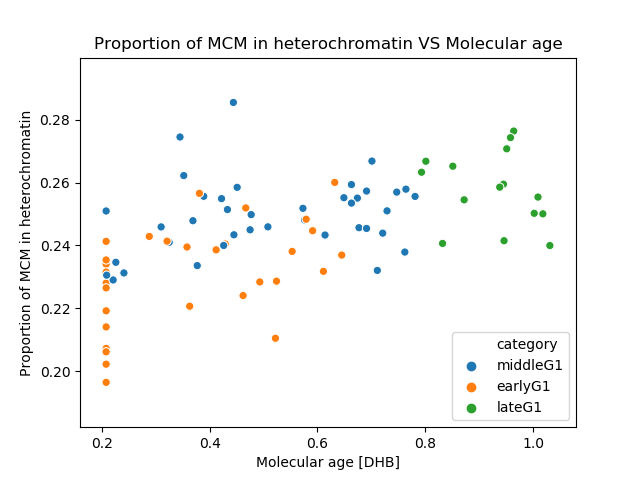

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [55]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_het/newdatasel.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


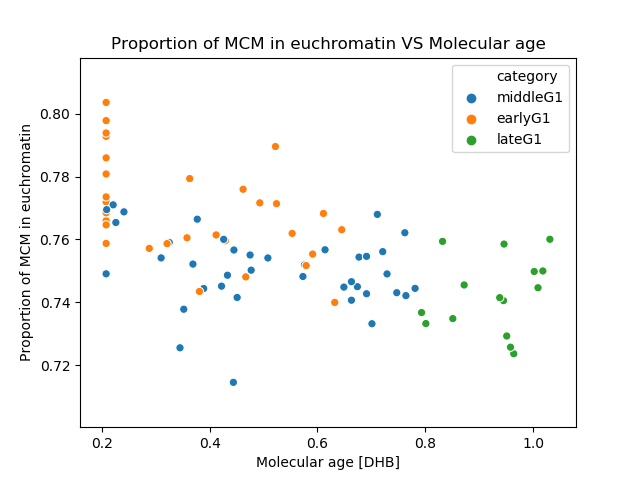

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [56]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_eu/newdatasel.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


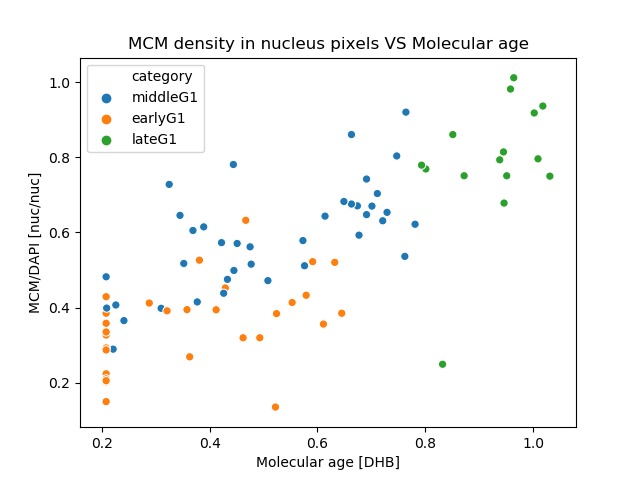

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [57]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_total/newdatasel.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


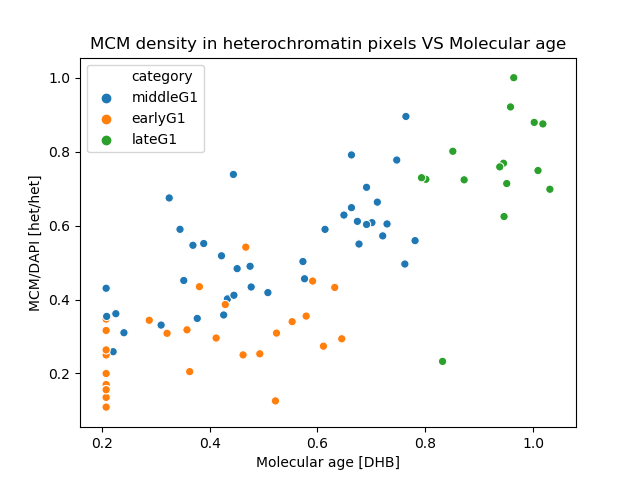

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [58]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_het/newdatasel.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


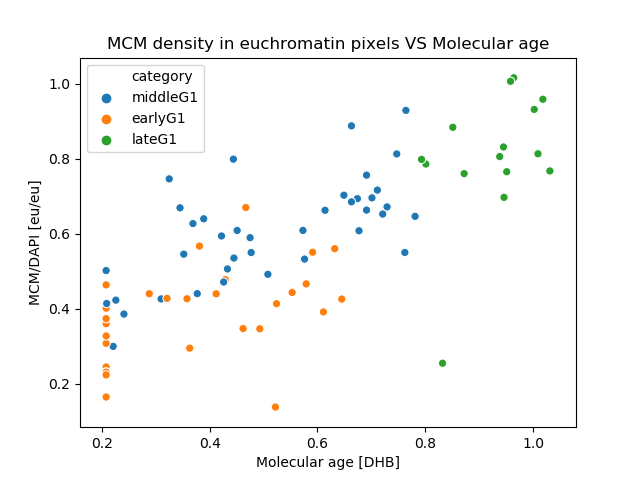

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [59]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_eu/newdatasel.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


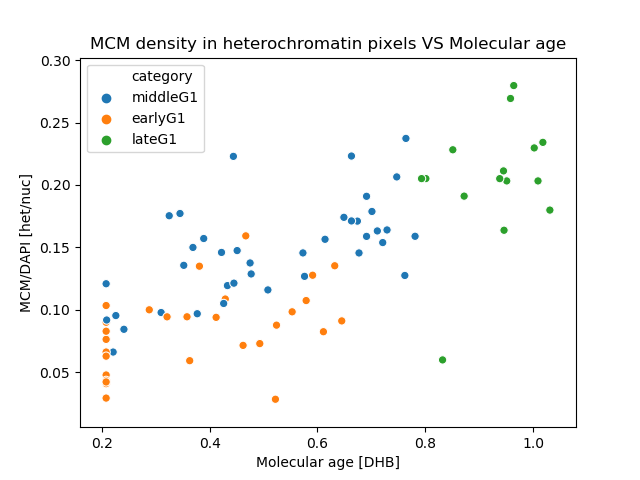

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [60]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_het/newdatasel.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[((newdatasel.day!='d20190625') & (newdatasel.day!='d201907012') &
                                                           ['G1' in x for x in newdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


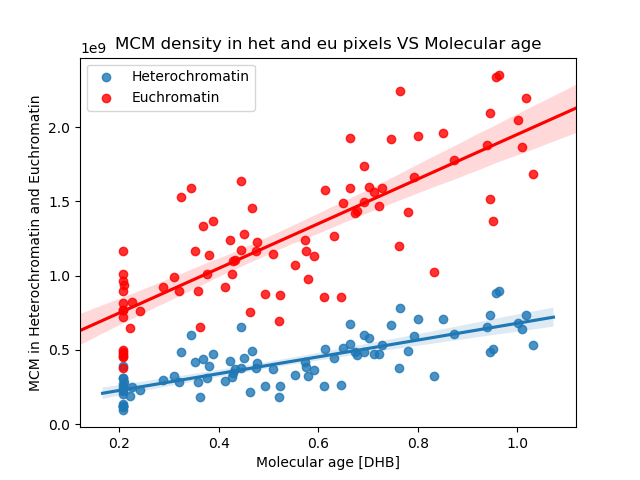

In [61]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_het
newdatasel['temp2']=newdatasel.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=newdatasel.loc[((newdatasel.day!='d20190625') & (newdatasel.day!='d201907012') &
                                                           ['G1' in x for x in newdatasel.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=newdatasel.loc[((newdatasel.day!='d20190625') & (newdatasel.day!='d201907012') &
                                                            ['G1' in x for x in newdatasel.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



## mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


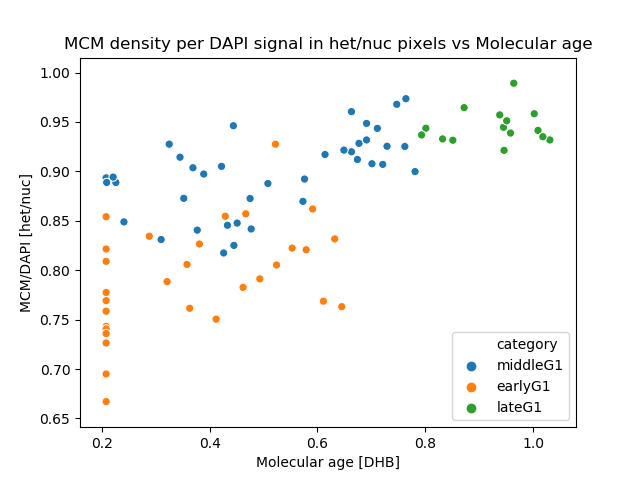

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [62]:
%matplotlib notebook
newdatasel['temp']=(newdatasel.nuc_mcm_het/newdatasel.nuc_DAPI_het)/(newdatasel.nuc_mcm_total/newdatasel.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[(['G1' in x for x in newdatasel.category]), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age')

# inner core of the nucleus

## 11.	How is heterochromtin/nucleus inner volume changing with molecular age?

<IPython.core.display.Javascript object>


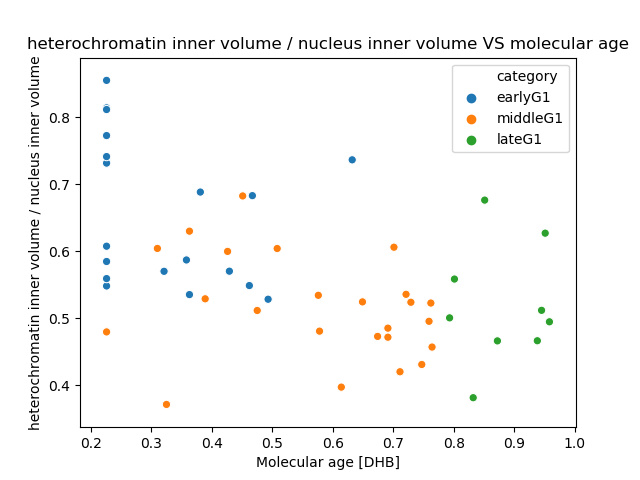

Text(0.5, 1.0, 'heterochromatin inner volume / nucleus inner volume VS molecular age')

In [162]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_vol_het/newdatasel.inner_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin inner volume / nucleus inner volume')
plt.title('heterochromatin inner volume / nucleus inner volume VS molecular age')

## 12. 	How is MCM signal in inner core changing with molecular age? 

<IPython.core.display.Javascript object>


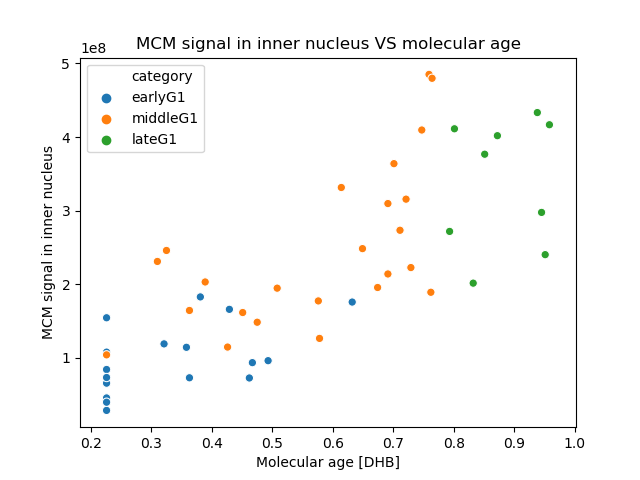

Text(0.5, 1.0, 'MCM signal in inner nucleus VS molecular age')

In [163]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_total',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner nucleus')
plt.title('MCM signal in inner nucleus VS molecular age')

## 13. 	How is MCM signal changing in inner heterochromatin with molecular age?

<IPython.core.display.Javascript object>


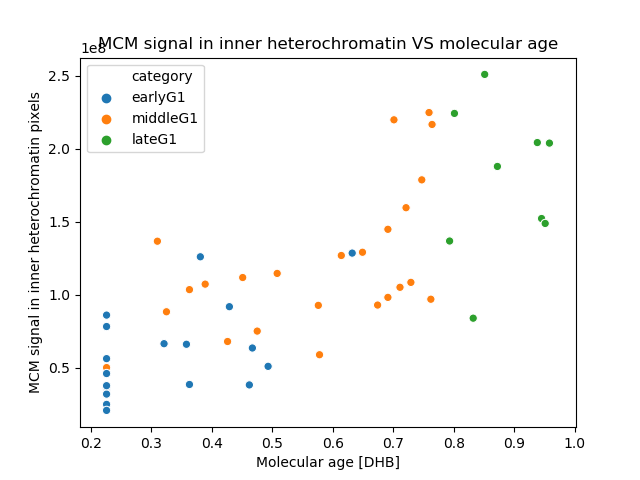

Text(0.5, 1.0, 'MCM signal in inner heterochromatin VS molecular age')

In [164]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_het',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner heterochromatin pixels')
plt.title('MCM signal in inner heterochromatin VS molecular age')

## 14. 	How is MCM signal changing in inner euchromatin with molecular age?

<IPython.core.display.Javascript object>


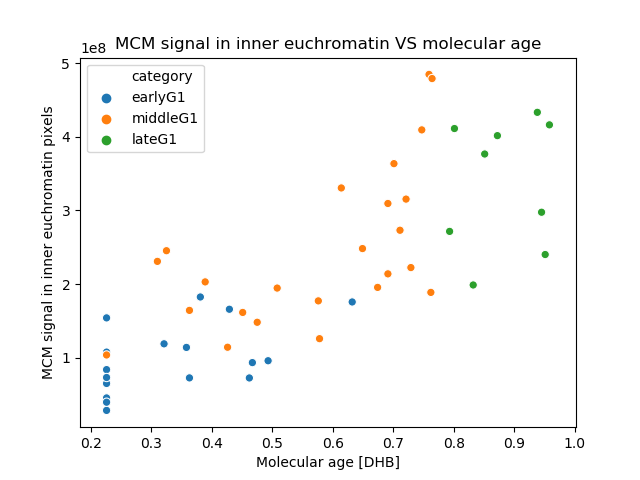

Text(0.5, 1.0, 'MCM signal in inner euchromatin VS molecular age')

In [165]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_eu',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner euchromatin pixels')
plt.title('MCM signal in inner euchromatin VS molecular age')

## 15.	How does a proportion of MCM loaded in inner heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


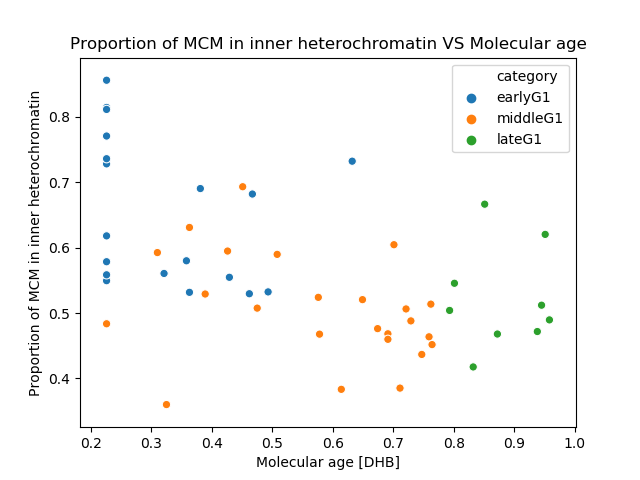

Text(0.5, 1.0, 'Proportion of MCM in inner heterochromatin VS Molecular age')

In [166]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_het/newdatasel.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner heterochromatin')
plt.title('Proportion of MCM in inner heterochromatin VS Molecular age')

## 16.	How does a proportion of MCM loaded in inner euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


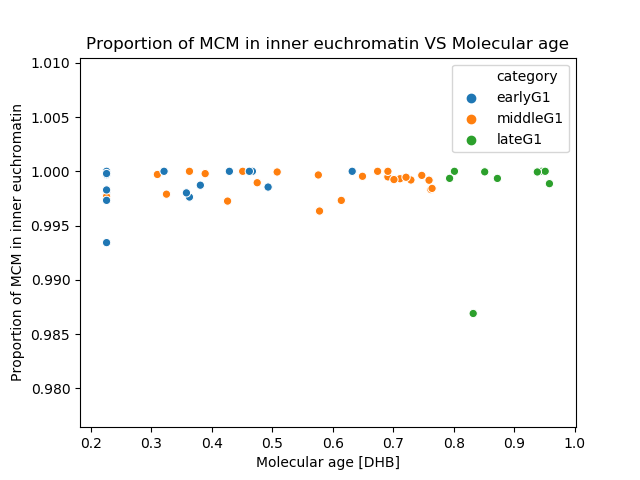

Text(0.5, 1.0, 'Proportion of MCM in inner euchromatin VS Molecular age')

In [167]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_eu/newdatasel.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner euchromatin')
plt.title('Proportion of MCM in inner euchromatin VS Molecular age')

## 17.	How does MCM/DAPI in inner core changes in molecular time?

<IPython.core.display.Javascript object>


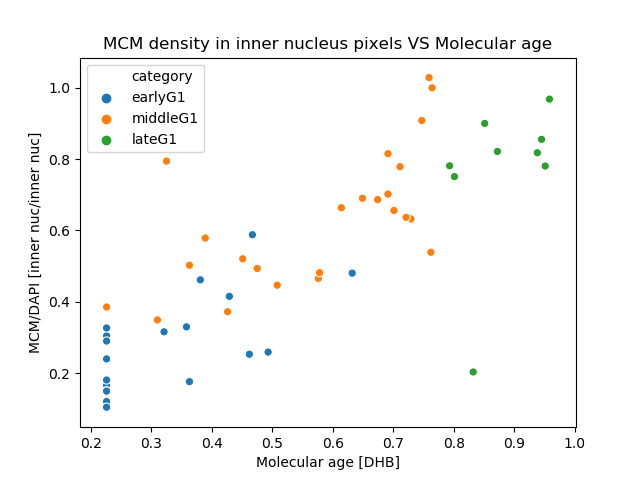

Text(0.5, 1.0, 'MCM density in inner nucleus pixels VS Molecular age')

In [168]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_total/newdatasel.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [inner nuc/inner nuc]')
plt.title('MCM density in inner nucleus pixels VS Molecular age')

## 18.	How does MCM/DAPI changes in inner heterochromatin molecular time?

<IPython.core.display.Javascript object>


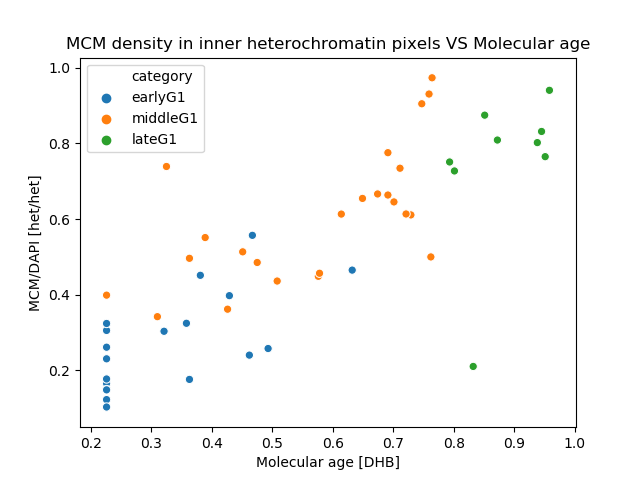

Text(0.5, 1.0, 'MCM density in inner heterochromatin pixels VS Molecular age')

In [169]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_het/newdatasel.inner_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in inner heterochromatin pixels VS Molecular age')

## 19. 	How does MCM/DAPI changes in inner euterochromatin molecular time?

<IPython.core.display.Javascript object>


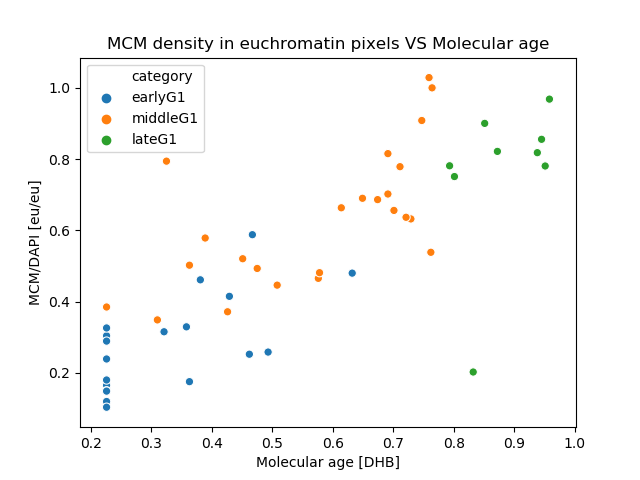

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [170]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_eu/newdatasel.inner_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 20. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


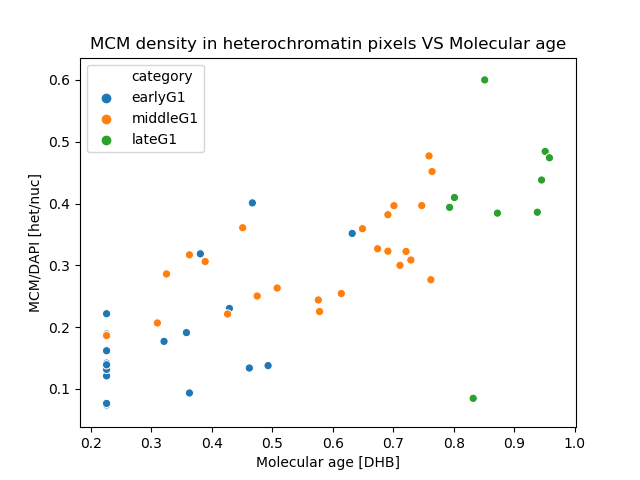

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [171]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_het/newdatasel.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[((newdatasel.day!='d20190625') & (newdatasel.day!='d201907012') &
                                                           ['G1' in x for x in newdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


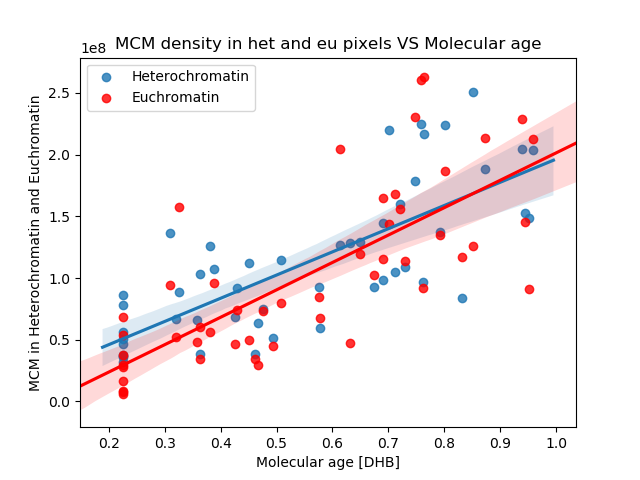

In [50]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_het
newdatasel['temp2']=newdatasel.inner_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=newdatasel.loc[((newdatasel.day!='d20190625') & (newdatasel.day!='d201907012') &
                                                           ['G1' in x for x in newdatasel.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=newdatasel.loc[((newdatasel.day!='d20190625') & (newdatasel.day!='d201907012') &
                                                            ['G1' in x for x in newdatasel.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



# outer shell of the nucleus

## 21.	How is heterochromtin/nucleus outer volume changing with molecular age?

<IPython.core.display.Javascript object>


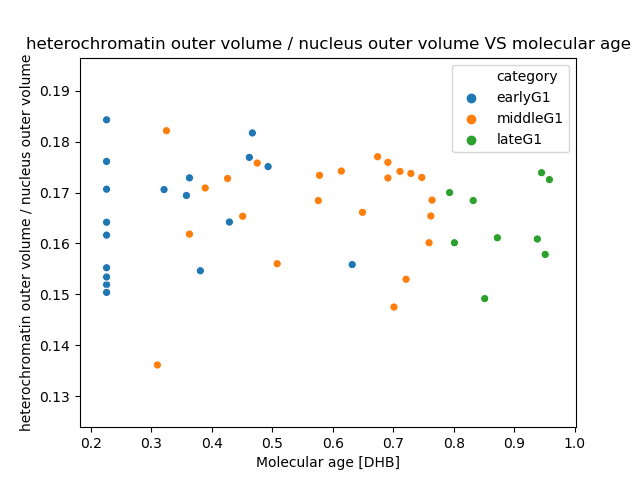

Text(0.5, 1.0, 'heterochromatin outer volume / nucleus outer volume VS molecular age')

In [172]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_vol_het/newdatasel.outer_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin outer volume / nucleus outer volume')
plt.title('heterochromatin outer volume / nucleus outer volume VS molecular age')

## 22. 	How is MCM signal in outer shell changing with molecular age? 

<IPython.core.display.Javascript object>


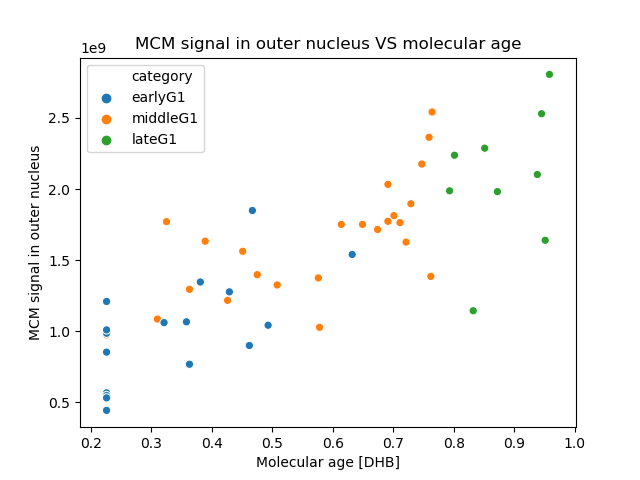

Text(0.5, 1.0, 'MCM signal in outer nucleus VS molecular age')

In [173]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_total',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer nucleus')
plt.title('MCM signal in outer nucleus VS molecular age')

## 23. 	How is MCM signal changing in outer heterochromatin with molecular age?

<IPython.core.display.Javascript object>


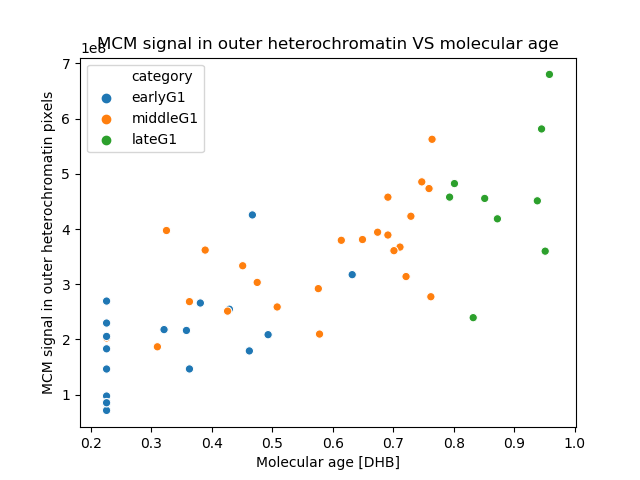

Text(0.5, 1.0, 'MCM signal in outer heterochromatin VS molecular age')

In [174]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_het',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer heterochromatin pixels')
plt.title('MCM signal in outer heterochromatin VS molecular age')

## 24. 	How is MCM signal changing in outer euchromatin with molecular age?

<IPython.core.display.Javascript object>


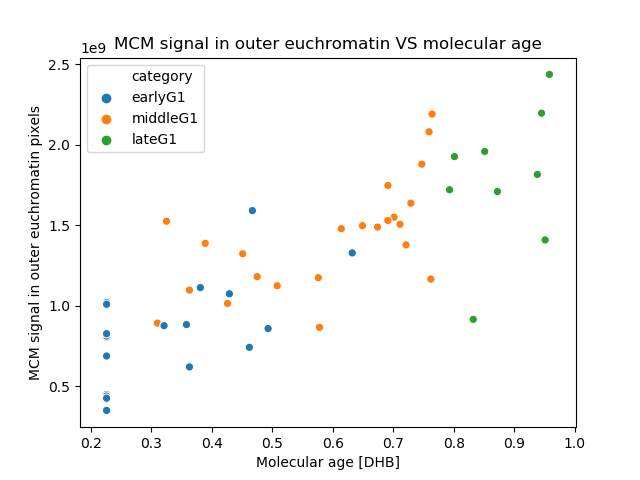

Text(0.5, 1.0, 'MCM signal in outer euchromatin VS molecular age')

In [175]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_eu',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer euchromatin pixels')
plt.title('MCM signal in outer euchromatin VS molecular age')

## 25.	How does a proportion of MCM loaded in outer heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


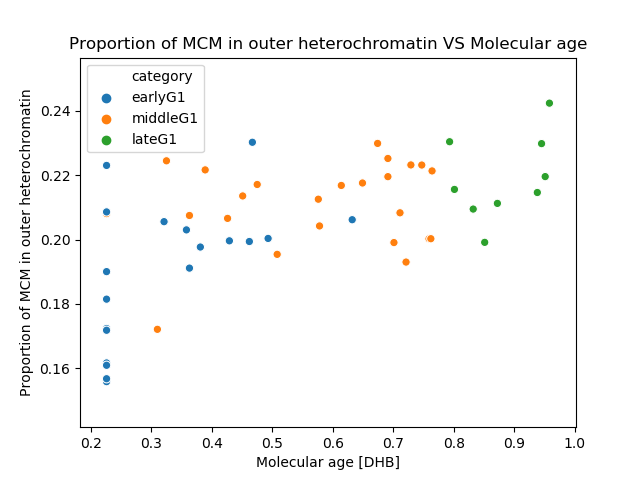

Text(0.5, 1.0, 'Proportion of MCM in outer heterochromatin VS Molecular age')

In [176]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_het/newdatasel.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer heterochromatin')
plt.title('Proportion of MCM in outer heterochromatin VS Molecular age')

## 26.	How does a proportion of MCM loaded in outer euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


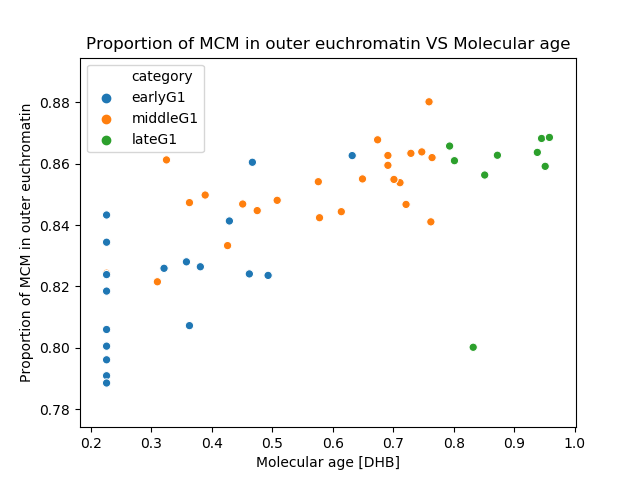

Text(0.5, 1.0, 'Proportion of MCM in outer euchromatin VS Molecular age')

In [177]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_eu/newdatasel.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer euchromatin')
plt.title('Proportion of MCM in outer euchromatin VS Molecular age')

## 27.	How does MCM/DAPI in outer shell changes in molecular time?

<IPython.core.display.Javascript object>


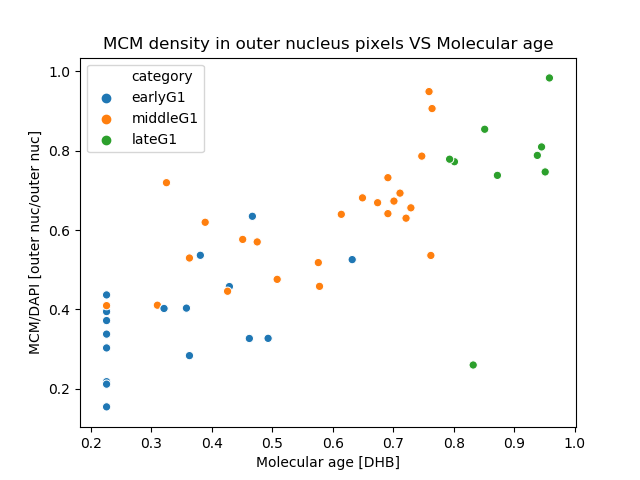

Text(0.5, 1.0, 'MCM density in outer nucleus pixels VS Molecular age')

In [178]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_total/newdatasel.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [outer nuc/outer nuc]')
plt.title('MCM density in outer nucleus pixels VS Molecular age')

## 28.	How does MCM/DAPI changes in outer heterochromatin molecular time?

<IPython.core.display.Javascript object>


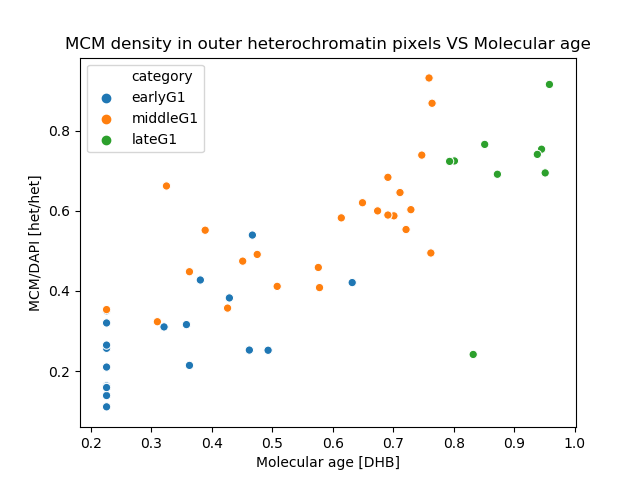

Text(0.5, 1.0, 'MCM density in outer heterochromatin pixels VS Molecular age')

In [179]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_het/newdatasel.outer_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in outer heterochromatin pixels VS Molecular age')

## 29. 	How does MCM/DAPI changes in outer euterochromatin molecular time?

<IPython.core.display.Javascript object>


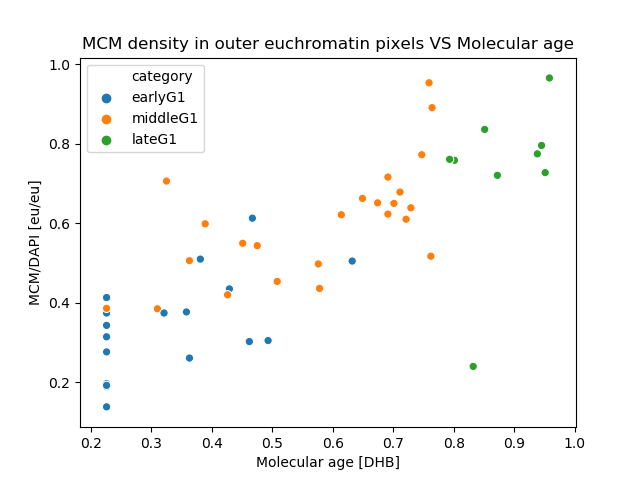

Text(0.5, 1.0, 'MCM density in outer euchromatin pixels VS Molecular age')

In [180]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_eu/newdatasel.outer_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in outer euchromatin pixels VS Molecular age')

## 30. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


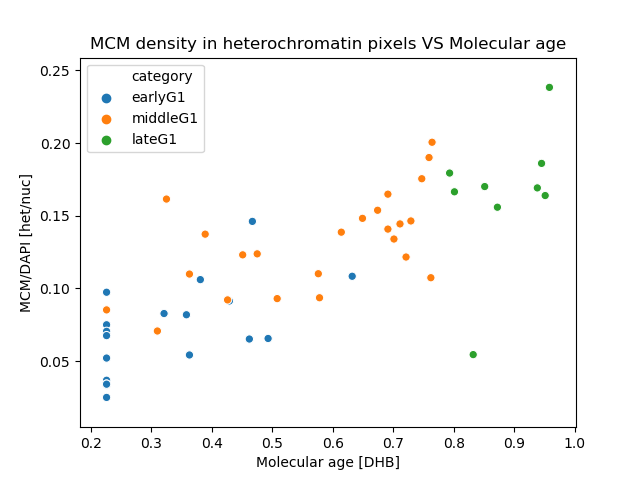

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [181]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_het/newdatasel.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[((newdatasel.day!='d20190625') & (newdatasel.day!='d201907012') &
                                                           ['G1' in x for x in newdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


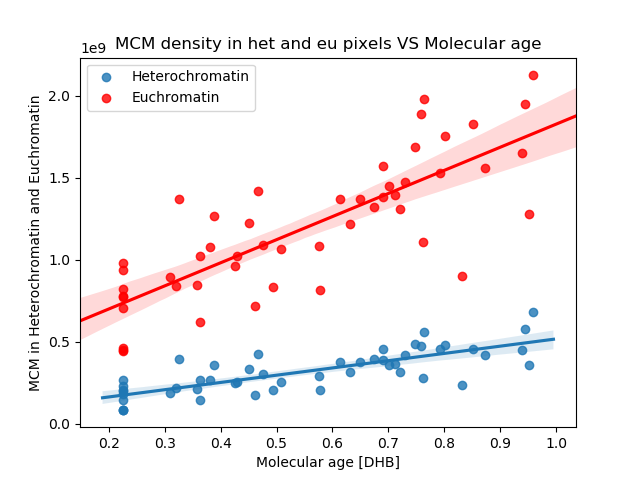

In [51]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_het
newdatasel['temp2']=newdatasel.outer_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=newdatasel.loc[((newdatasel.day!='d20190625') & (newdatasel.day!='d201907012') &
                                                           ['G1' in x for x in newdatasel.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=newdatasel.loc[((newdatasel.day!='d20190625') & (newdatasel.day!='d201907012') &
                                                            ['G1' in x for x in newdatasel.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



# non-deconvolved

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


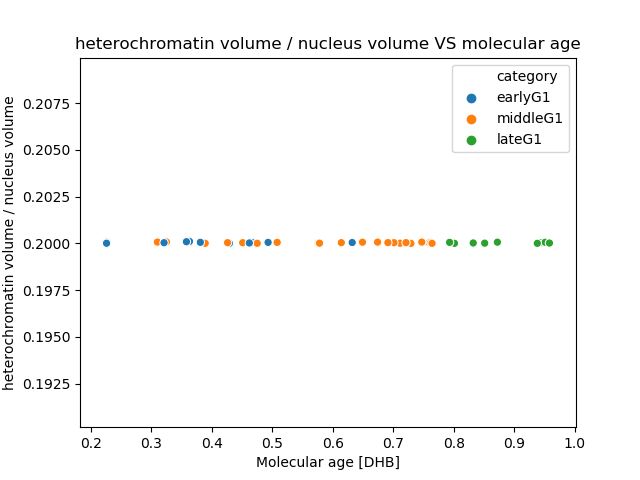

Text(0.5, 1.0, 'heterochromatin volume / nucleus volume VS molecular age')

In [182]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_vol_het/newdatand.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volume / nucleus volume VS molecular age')

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


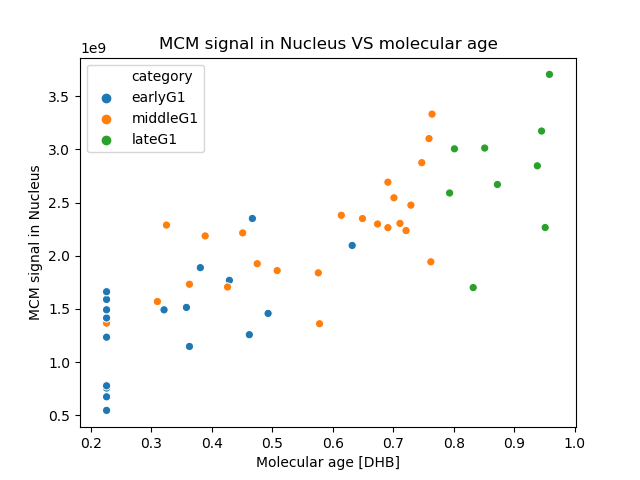

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [183]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


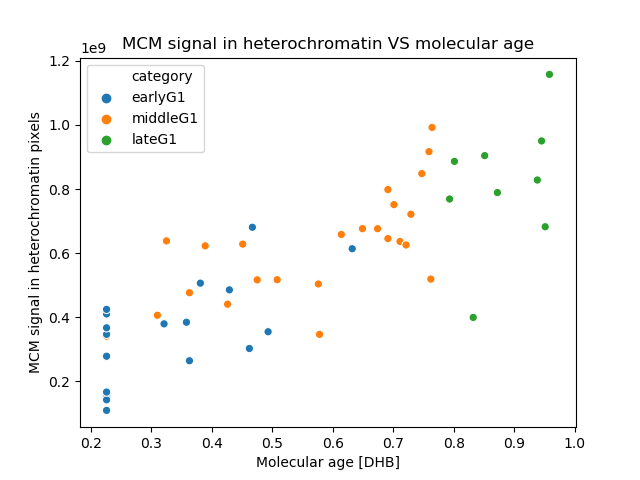

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [184]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


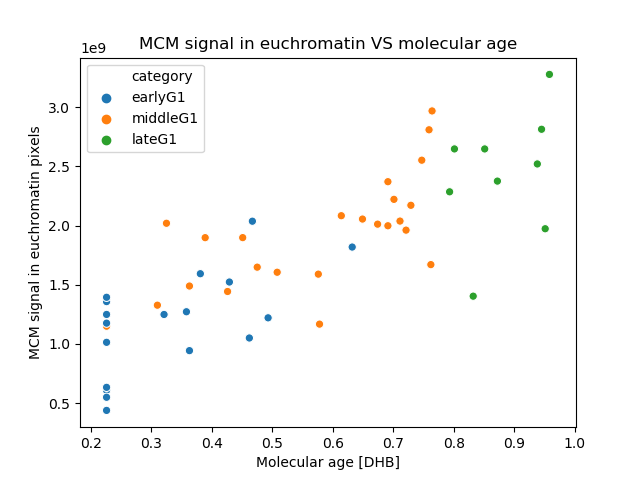

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [185]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


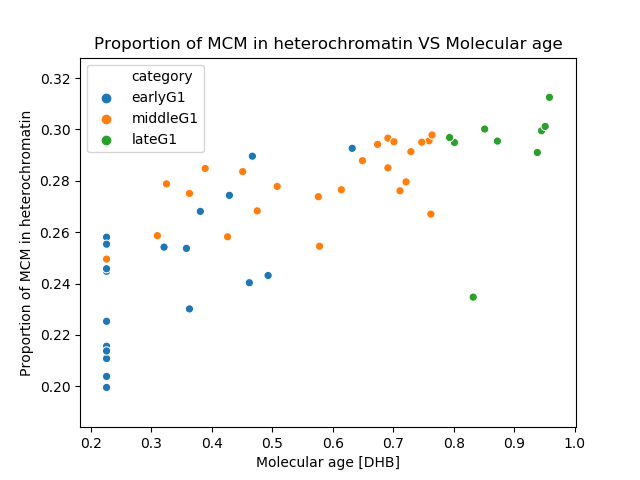

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [186]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_het/newdatand.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


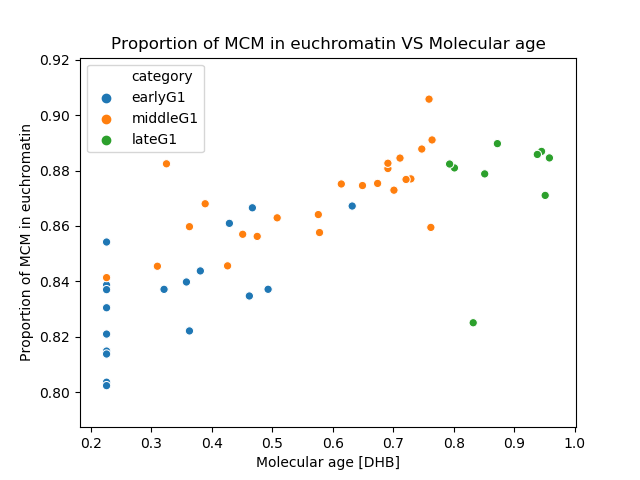

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [187]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_eu/newdatand.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


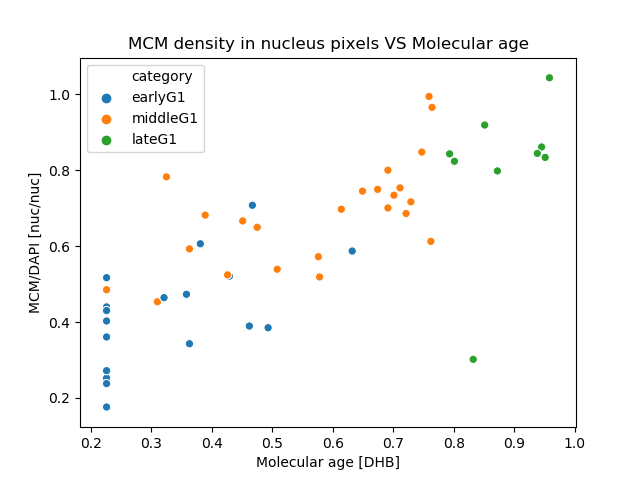

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [188]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_total/newdatand.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


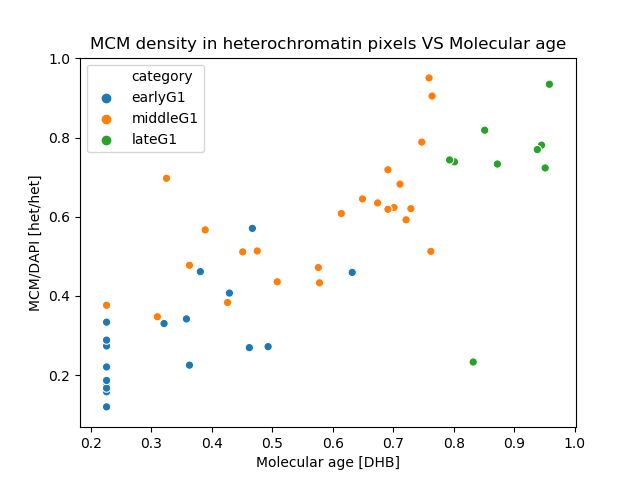

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [189]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_het/newdatand.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


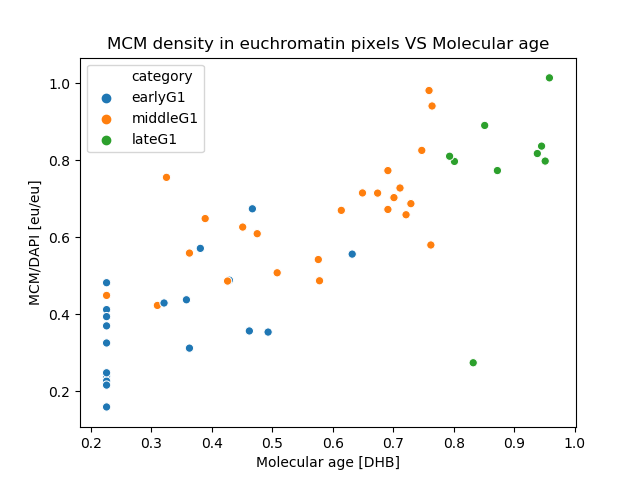

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [190]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_eu/newdatand.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


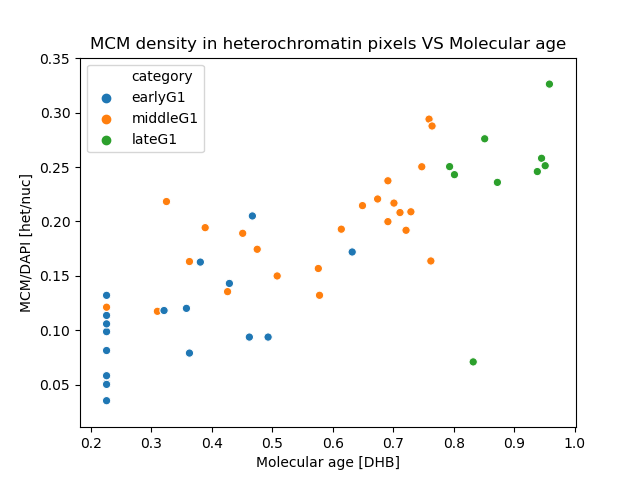

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [191]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_het/newdatand.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[((newdatand.day!='d20190625') & (newdatand.day!='d201907012') &
                                                           ['G1' in x for x in newdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


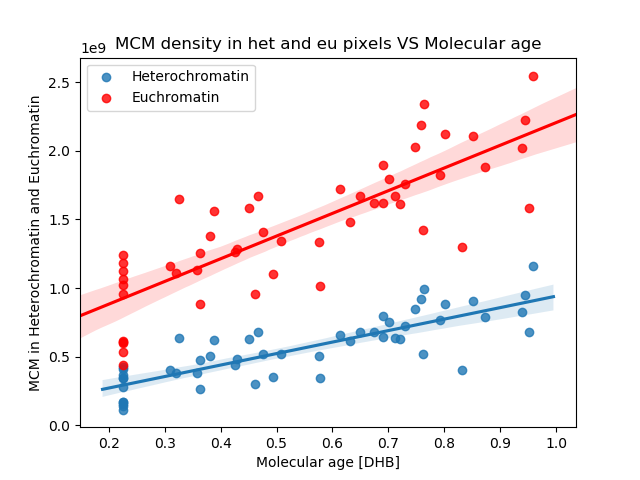

In [53]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_het
newdatand['temp2']=newdatand.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=newdatand.loc[((newdatand.day!='d20190625') & (newdatand.day!='d201907012') &
                                                           ['G1' in x for x in newdatand.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=newdatand.loc[((newdatand.day!='d20190625') & (newdatand.day!='d201907012') &
                                                            ['G1' in x for x in newdatand.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



# inner core of the nucleus

## 11.	How is heterochromtin/nucleus inner volume changing with molecular age?

<IPython.core.display.Javascript object>


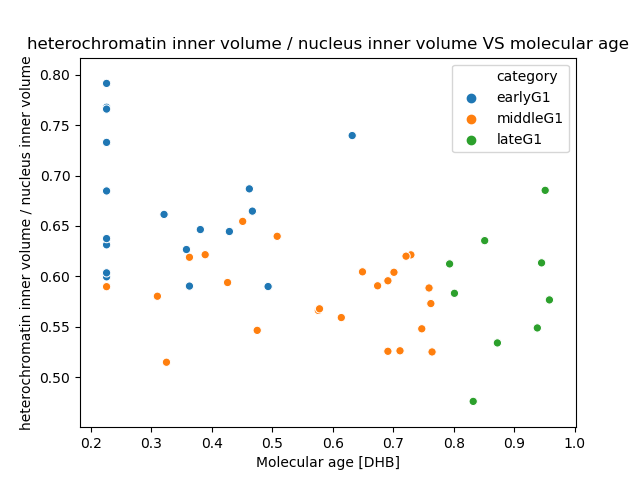

Text(0.5, 1.0, 'heterochromatin inner volume / nucleus inner volume VS molecular age')

In [192]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_vol_het/newdatand.inner_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin inner volume / nucleus inner volume')
plt.title('heterochromatin inner volume / nucleus inner volume VS molecular age')

## 12. 	How is MCM signal in inner core changing with molecular age? 

<IPython.core.display.Javascript object>


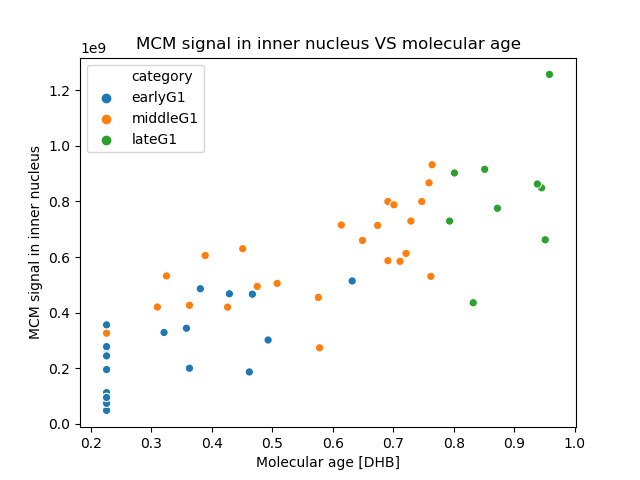

Text(0.5, 1.0, 'MCM signal in inner nucleus VS molecular age')

In [193]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_total',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner nucleus')
plt.title('MCM signal in inner nucleus VS molecular age')

## 13. 	How is MCM signal changing in inner heterochromatin with molecular age?

<IPython.core.display.Javascript object>


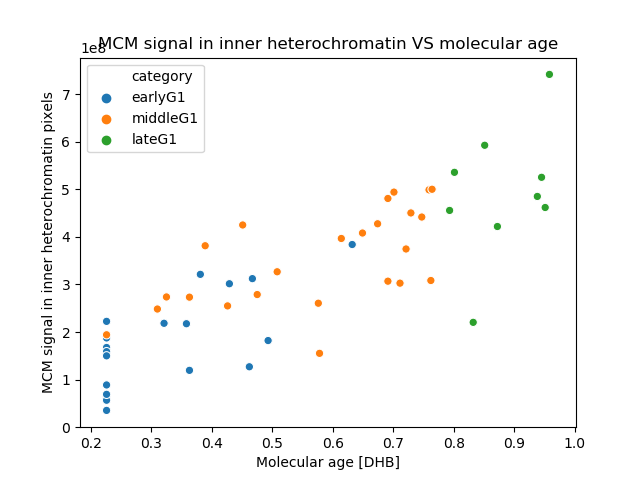

Text(0.5, 1.0, 'MCM signal in inner heterochromatin VS molecular age')

In [194]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_het',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner heterochromatin pixels')
plt.title('MCM signal in inner heterochromatin VS molecular age')

## 14. 	How is MCM signal changing in inner euchromatin with molecular age?

<IPython.core.display.Javascript object>


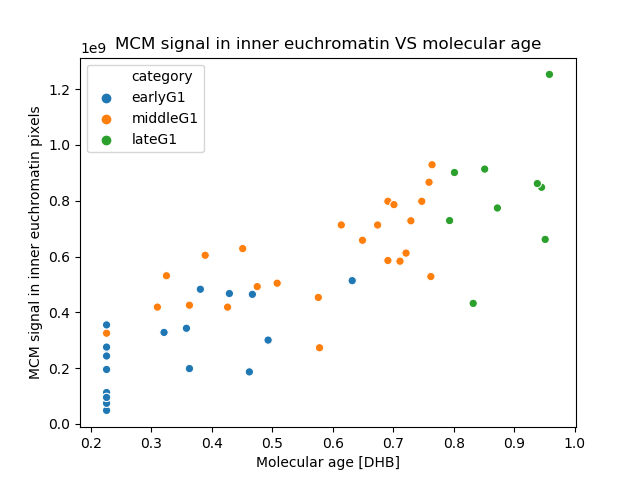

Text(0.5, 1.0, 'MCM signal in inner euchromatin VS molecular age')

In [195]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_eu',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner euchromatin pixels')
plt.title('MCM signal in inner euchromatin VS molecular age')

## 15.	How does a proportion of MCM loaded in inner heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


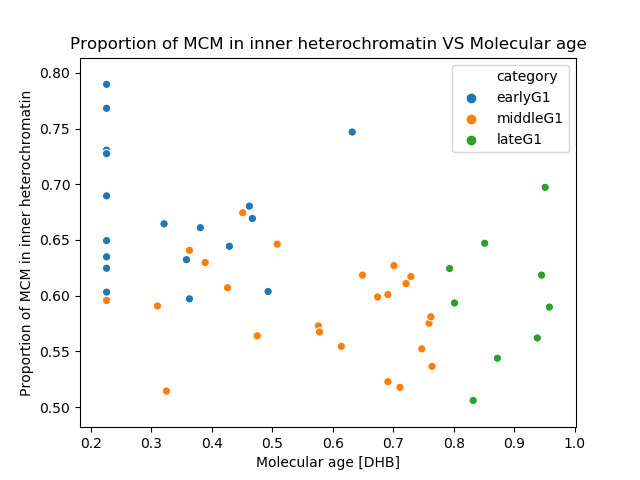

Text(0.5, 1.0, 'Proportion of MCM in inner heterochromatin VS Molecular age')

In [196]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_het/newdatand.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner heterochromatin')
plt.title('Proportion of MCM in inner heterochromatin VS Molecular age')

## 16.	How does a proportion of MCM loaded in inner euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


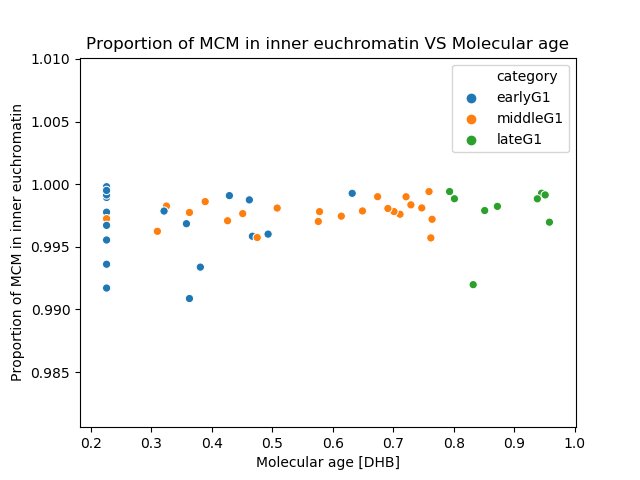

Text(0.5, 1.0, 'Proportion of MCM in inner euchromatin VS Molecular age')

In [197]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_eu/newdatand.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner euchromatin')
plt.title('Proportion of MCM in inner euchromatin VS Molecular age')

## 17.	How does MCM/DAPI in inner core changes in molecular time?

<IPython.core.display.Javascript object>


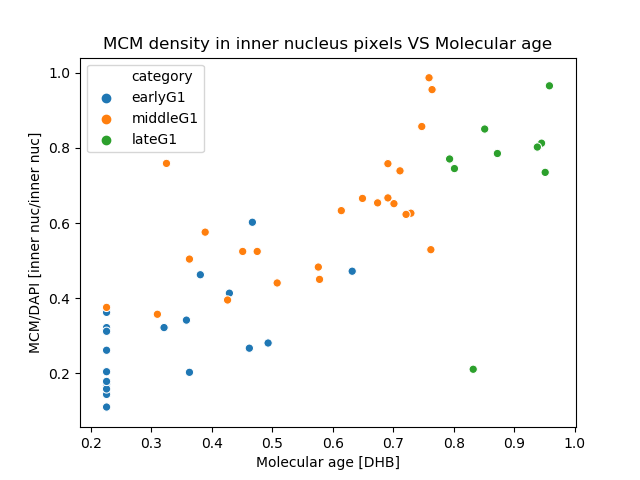

Text(0.5, 1.0, 'MCM density in inner nucleus pixels VS Molecular age')

In [198]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_total/newdatand.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [inner nuc/inner nuc]')
plt.title('MCM density in inner nucleus pixels VS Molecular age')

## 18.	How does MCM/DAPI changes in inner heterochromatin molecular time?

<IPython.core.display.Javascript object>


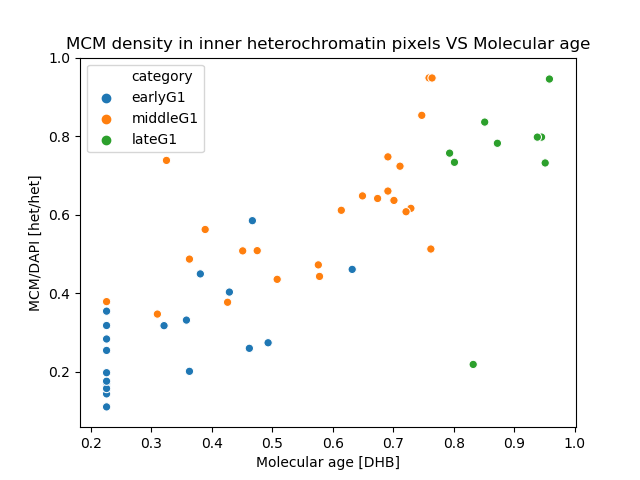

Text(0.5, 1.0, 'MCM density in inner heterochromatin pixels VS Molecular age')

In [199]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_het/newdatand.inner_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in inner heterochromatin pixels VS Molecular age')

## 19. 	How does MCM/DAPI changes in inner euterochromatin molecular time?

<IPython.core.display.Javascript object>


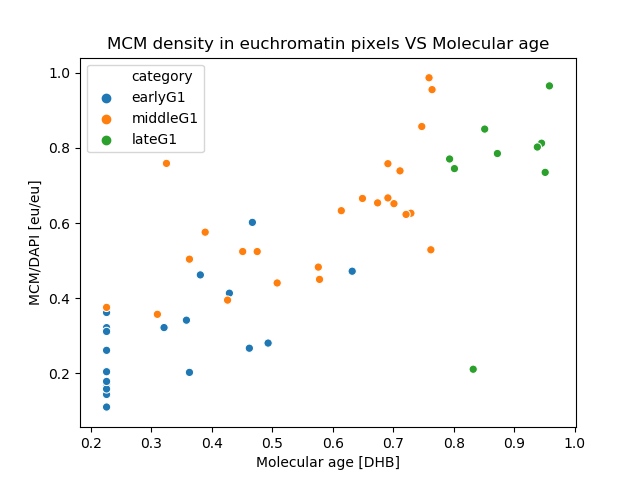

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [200]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_eu/newdatand.inner_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 20. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


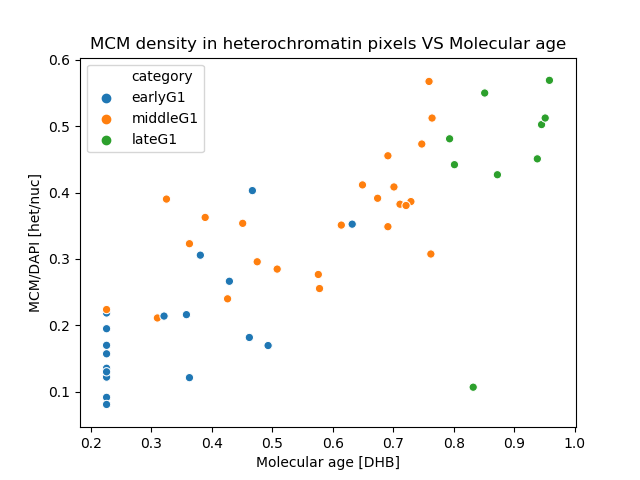

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [201]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_het/newdatand.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[((newdatand.day!='d20190625') & (newdatand.day!='d201907012') &
                                                           ['G1' in x for x in newdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


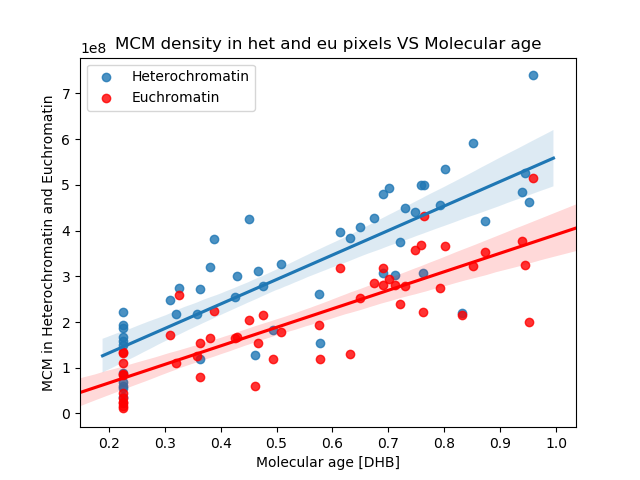

In [54]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_het
newdatand['temp2']=newdatand.inner_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=newdatand.loc[((newdatand.day!='d20190625') & (newdatand.day!='d201907012') &
                                                           ['G1' in x for x in newdatand.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=newdatand.loc[((newdatand.day!='d20190625') & (newdatand.day!='d201907012') &
                                                            ['G1' in x for x in newdatand.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



# outer shell of the nucleus

## 21.	How is heterochromtin/nucleus outer volume changing with molecular age?

<IPython.core.display.Javascript object>


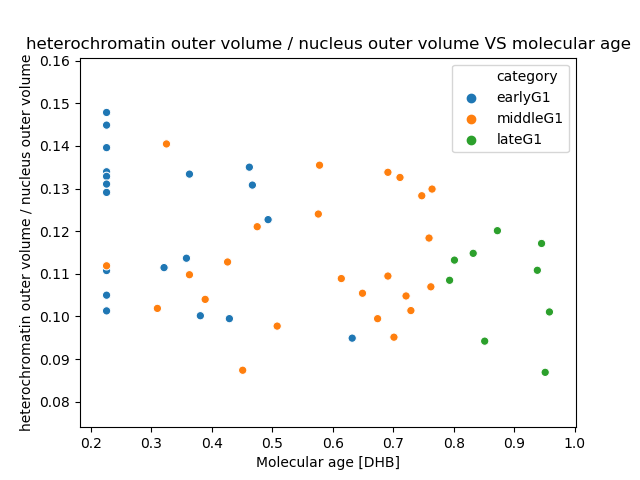

Text(0.5, 1.0, 'heterochromatin outer volume / nucleus outer volume VS molecular age')

In [202]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_vol_het/newdatand.outer_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin outer volume / nucleus outer volume')
plt.title('heterochromatin outer volume / nucleus outer volume VS molecular age')

## 22. 	How is MCM signal in outer shell changing with molecular age? 

<IPython.core.display.Javascript object>


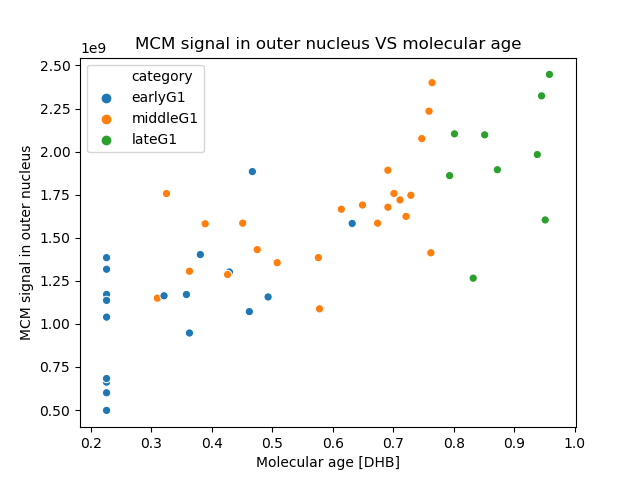

Text(0.5, 1.0, 'MCM signal in outer nucleus VS molecular age')

In [203]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_total',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer nucleus')
plt.title('MCM signal in outer nucleus VS molecular age')

## 23. 	How is MCM signal changing in outer heterochromatin with molecular age?

<IPython.core.display.Javascript object>


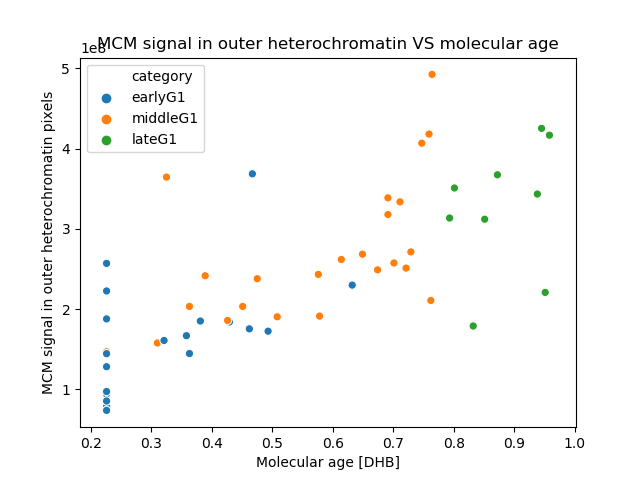

Text(0.5, 1.0, 'MCM signal in outer heterochromatin VS molecular age')

In [204]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_het',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer heterochromatin pixels')
plt.title('MCM signal in outer heterochromatin VS molecular age')

## 24. 	How is MCM signal changing in outer euchromatin with molecular age?

<IPython.core.display.Javascript object>


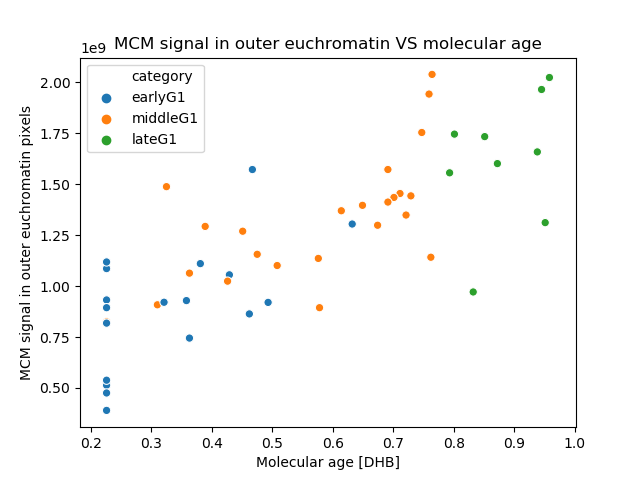

Text(0.5, 1.0, 'MCM signal in outer euchromatin VS molecular age')

In [205]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_eu',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer euchromatin pixels')
plt.title('MCM signal in outer euchromatin VS molecular age')

## 25.	How does a proportion of MCM loaded in outer heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


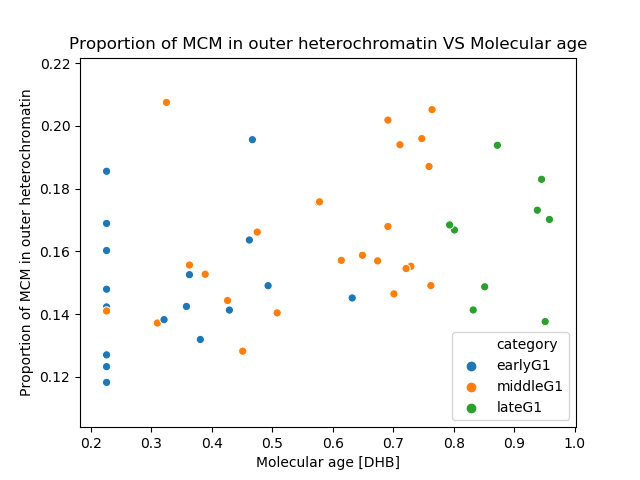

Text(0.5, 1.0, 'Proportion of MCM in outer heterochromatin VS Molecular age')

In [206]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_het/newdatand.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer heterochromatin')
plt.title('Proportion of MCM in outer heterochromatin VS Molecular age')

## 26.	How does a proportion of MCM loaded in outer euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


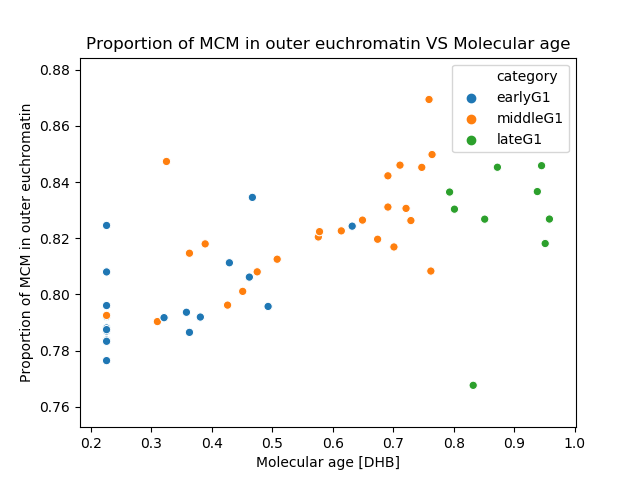

Text(0.5, 1.0, 'Proportion of MCM in outer euchromatin VS Molecular age')

In [207]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_eu/newdatand.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer euchromatin')
plt.title('Proportion of MCM in outer euchromatin VS Molecular age')

## 27.	How does MCM/DAPI in outer shell changes in molecular time?

<IPython.core.display.Javascript object>


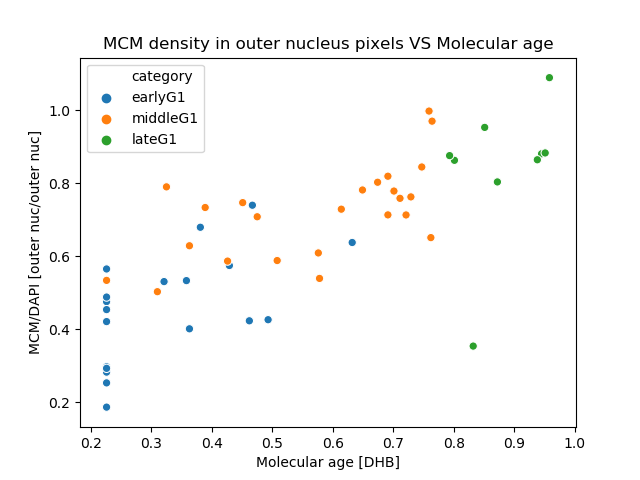

Text(0.5, 1.0, 'MCM density in outer nucleus pixels VS Molecular age')

In [208]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_total/newdatand.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [outer nuc/outer nuc]')
plt.title('MCM density in outer nucleus pixels VS Molecular age')

## 28.	How does MCM/DAPI changes in outer heterochromatin molecular time?

<IPython.core.display.Javascript object>


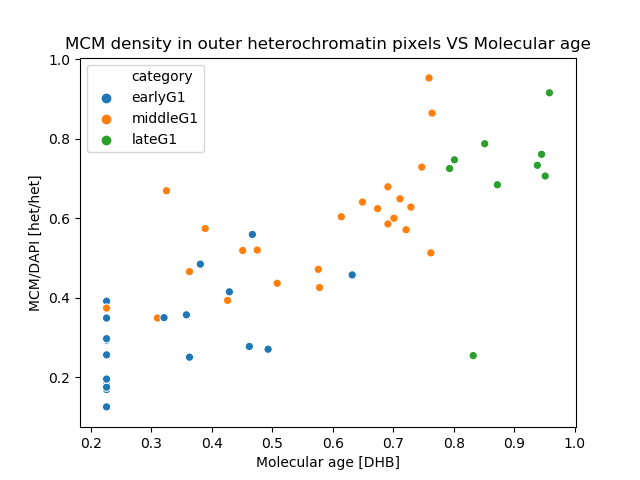

Text(0.5, 1.0, 'MCM density in outer heterochromatin pixels VS Molecular age')

In [209]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_het/newdatand.outer_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in outer heterochromatin pixels VS Molecular age')

## 29. 	How does MCM/DAPI changes in outer euterochromatin molecular time?

<IPython.core.display.Javascript object>


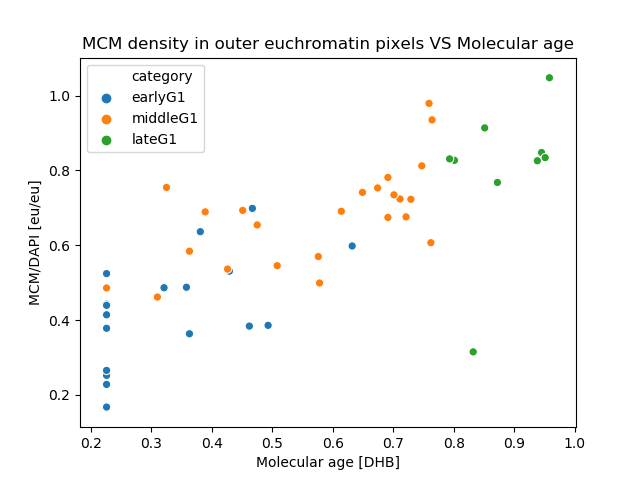

Text(0.5, 1.0, 'MCM density in outer euchromatin pixels VS Molecular age')

In [210]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_eu/newdatand.outer_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in outer euchromatin pixels VS Molecular age')

## 30. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


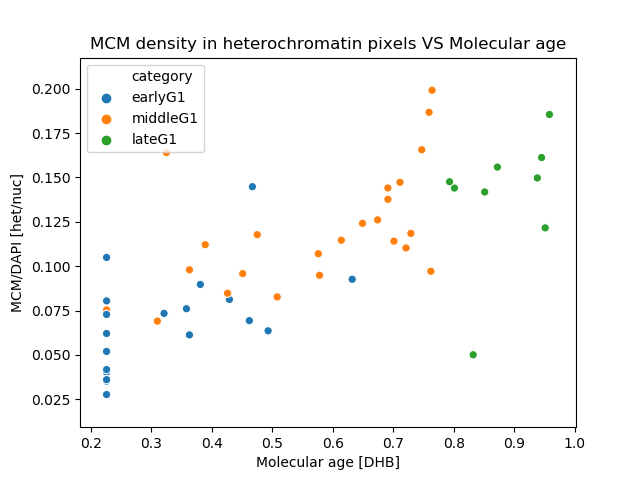

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [211]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_het/newdatand.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[((newdatand.day!='d20190625') & (newdatand.day!='d201907012') &
                                                           ['G1' in x for x in newdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


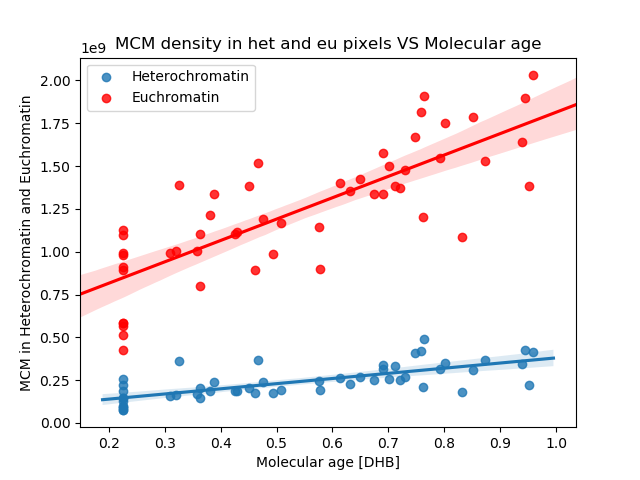

In [55]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_het
newdatand['temp2']=newdatand.outer_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=newdatand.loc[((newdatand.day!='d20190625') & (newdatand.day!='d201907012') &
                                                           ['G1' in x for x in newdatand.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=newdatand.loc[((newdatand.day!='d20190625') & (newdatand.day!='d201907012') &
                                                            ['G1' in x for x in newdatand.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")

